c:\Users\pragy\OneDrive\Desktop\fish_classification_project\fish_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\pragy\OneDrive\Desktop\fish_classification_project\fish_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\pragy\OneDrive\Desktop\fish_classification_project\fish_env\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime

🔄 COMPLETE DATA PREPROCESSING AND AUGMENTATION PIPELINE
TensorFlow version: 2.20.0-rc0
Keras version: 3.11.1

⚙️  PREPROCESSING CONFIGURATION
--------------------------------------------------
📐 Target Image Size: 224 x 224 x 3
📦 Batch Size: 32
🔢 Rescale Factor: 0.00392156862745098
   ✅ Train: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\data\train
   ✅ Test: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\data\test
   ✅ Val: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\data\val

📊 ANALYZING DATASET FOR AUGMENTATION STRATEGY
--------------------------------------------------
📈 Dataset Analysis:
   • Total training images: 6,225
   • Number of classes: 11
   • Average images per class: 565.9
🎯 Selected Augmentation Level: MODERATE
📈 Effective dataset size will be: ~12,450 images

🎨 DEFINING AUGMENTATION STRATEGIES
--------------------------------------------------
✅ Selected MODERATE augmentation with parameters:
   • rescale: 0.0039215686274509

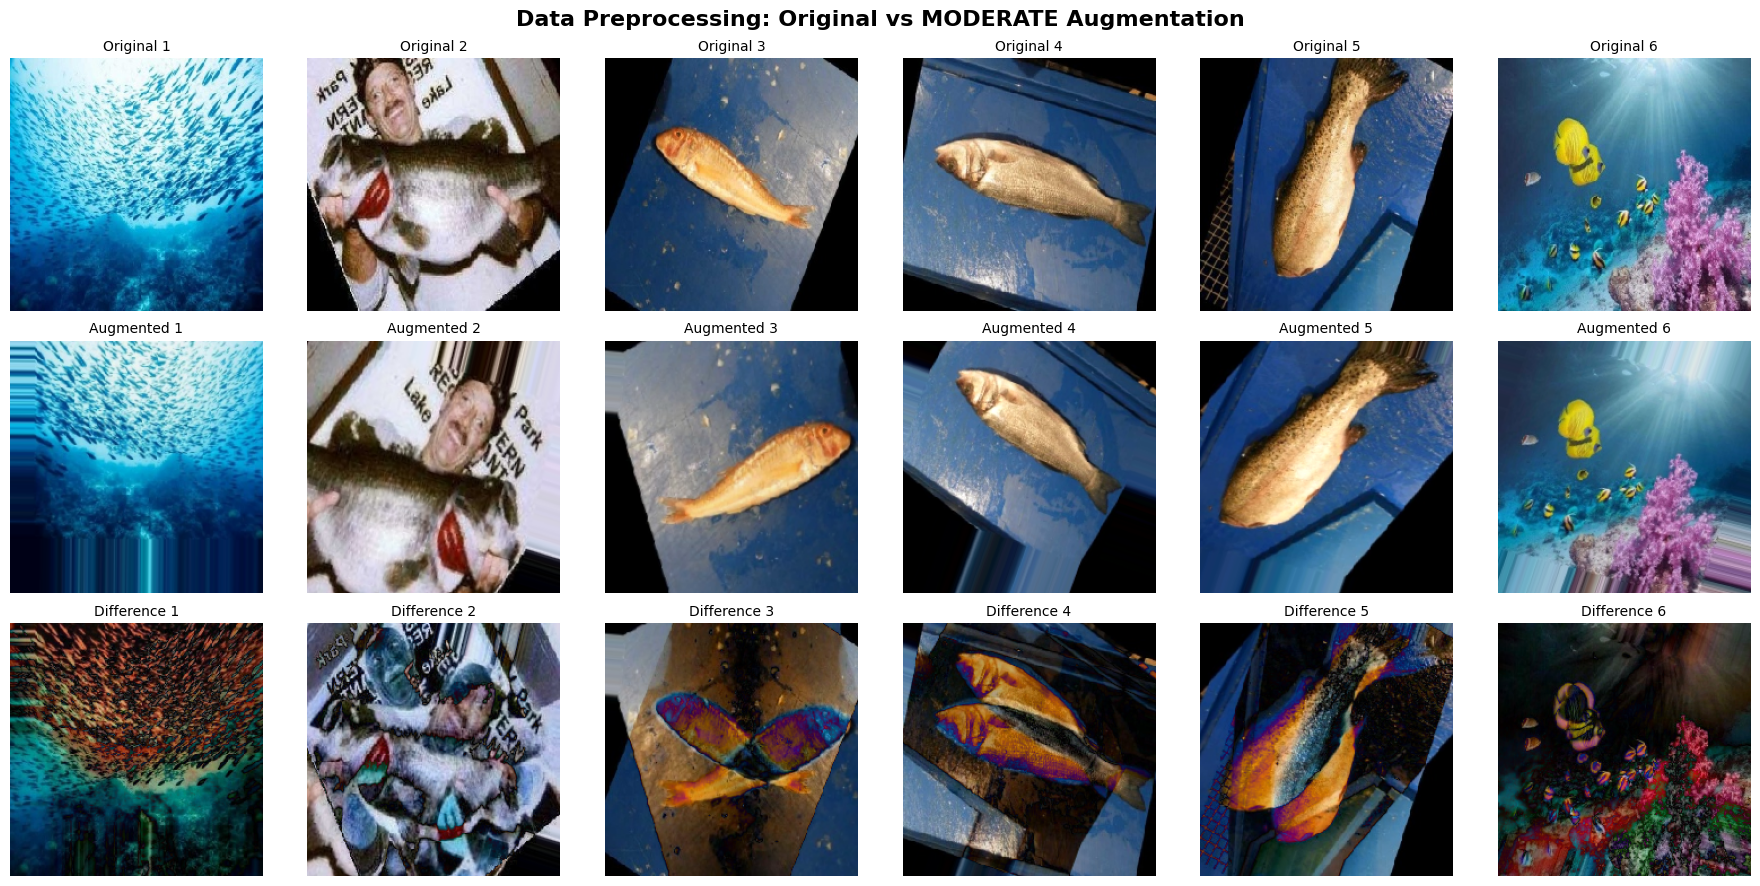

✅ Augmentation visualization complete!

🎭 COMPARING ALL AUGMENTATION STRATEGIES
--------------------------------------------------
Found 6225 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.


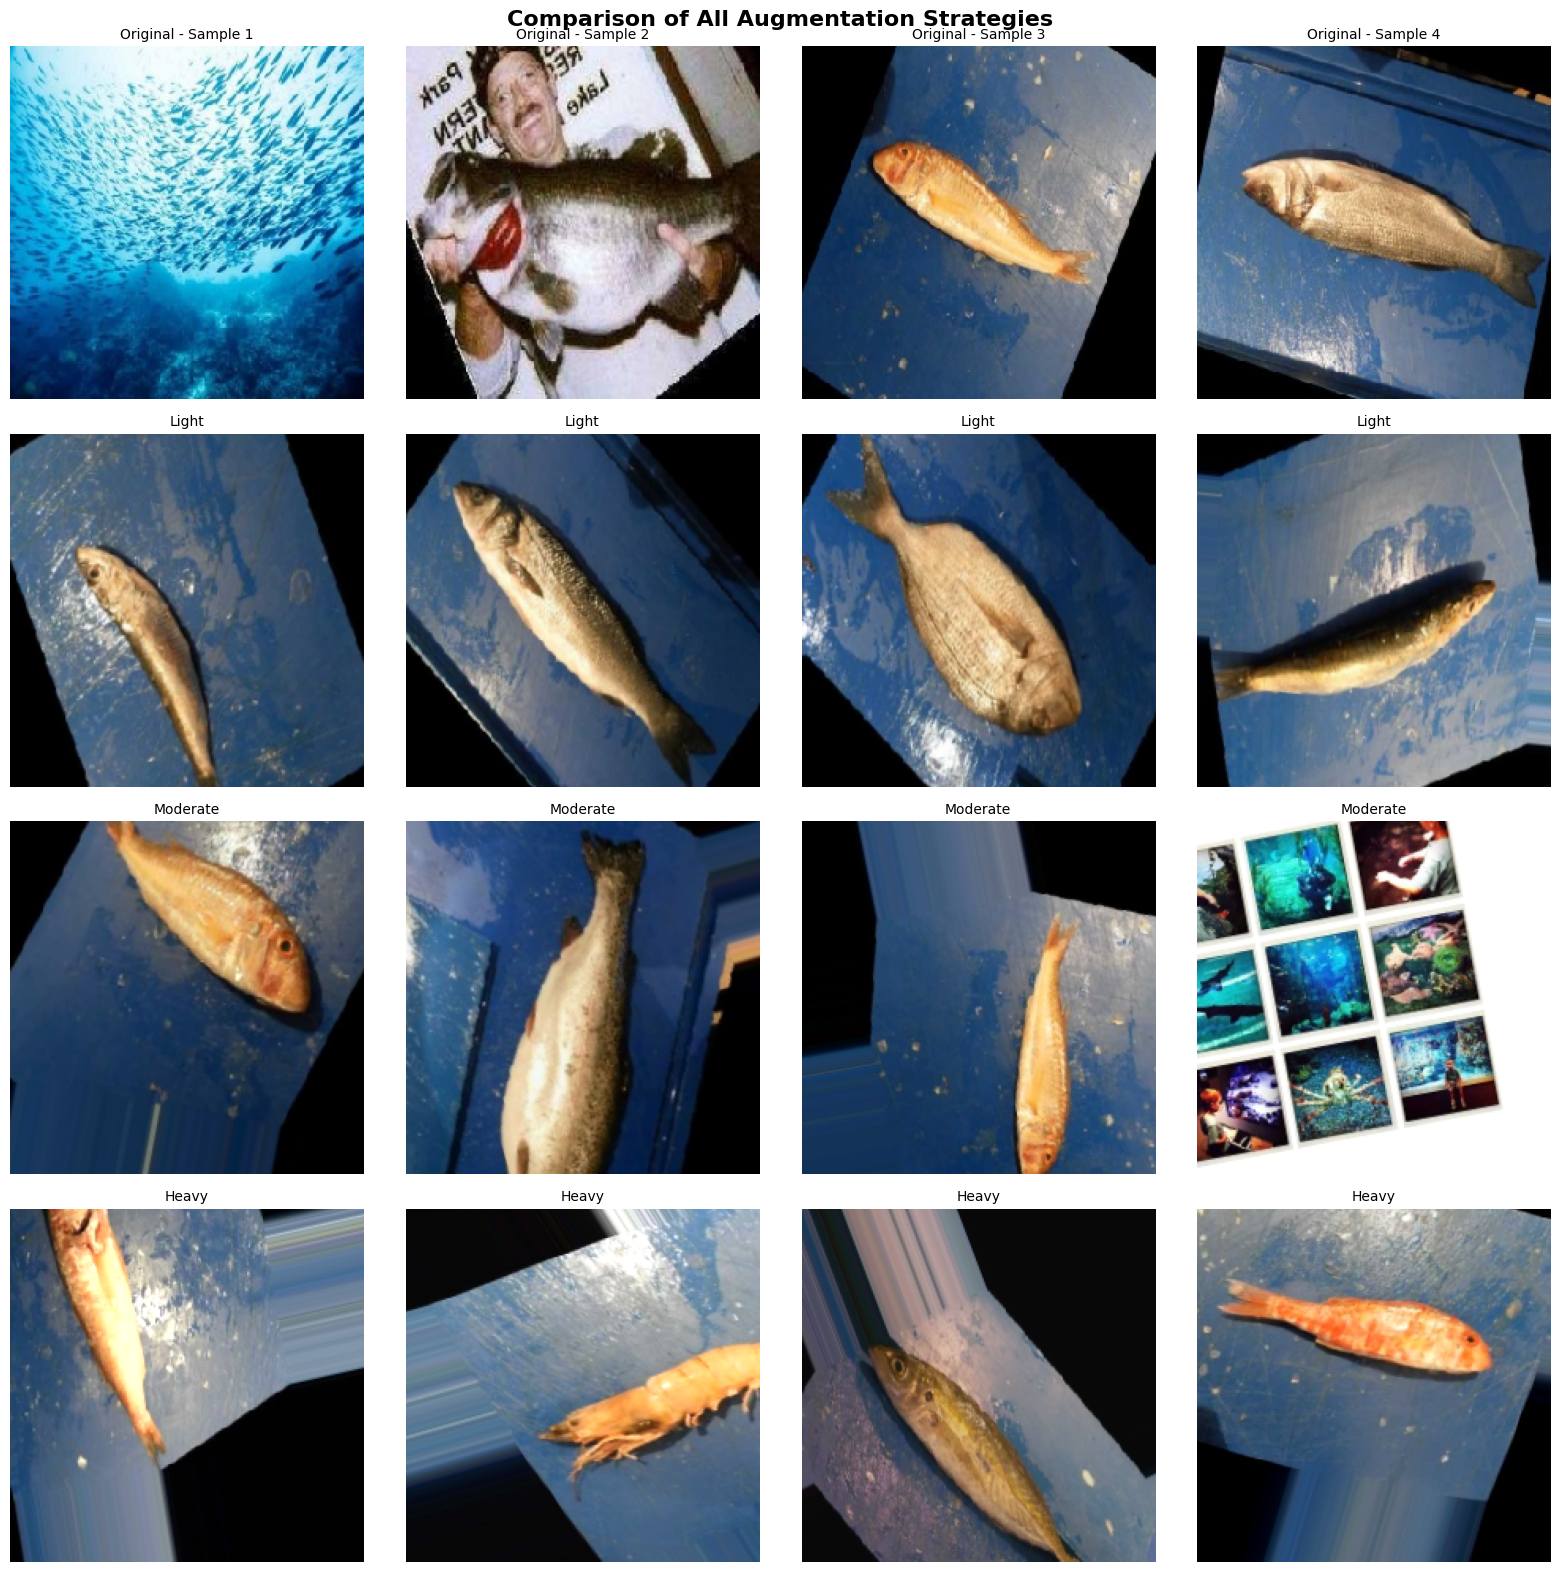


🔍 DATA PIPELINE VALIDATION
--------------------------------------------------
✅ Training Generator:
   • Batch shape: (32, 224, 224, 3)
   • Pixel range: 0.000 to 1.000
   • Memory per batch: 18.4 MB
✅ Validation Generator:
   • Batch shape: (32, 224, 224, 3)
   • Pixel range: 0.000 to 1.000
   • Memory per batch: 18.4 MB
✅ Test Generator:
   • Batch shape: (32, 224, 224, 3)
   • Pixel range: 0.000 to 1.000
   • Memory per batch: 18.4 MB

🎉 DATA PIPELINE VALIDATION SUCCESSFUL!

⚡ DATA LOADING PERFORMANCE TEST
--------------------------------------------------
Testing data loading performance...
📊 Performance Metrics:
   • Average batch loading time: 0.689 seconds
   • Images per second: 46.4
   • Estimated time per epoch: 2.2 minutes

✅ Data loading performance is acceptable!

🛠️  CREATING PREPROCESSING UTILITIES
--------------------------------------------------
✅ Preprocessing utilities created!

🧪 Testing utilities with: 0055ESUKGS38.jpg
   ✅ Preprocessing successful: (1, 224, 224,

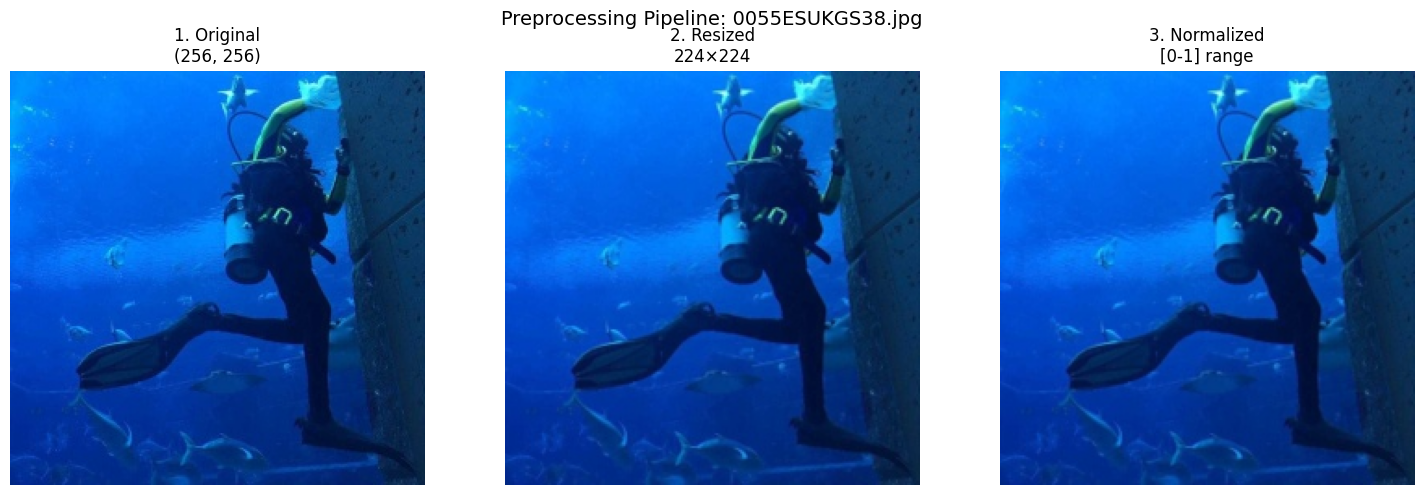


💾 SAVING PREPROCESSING CONFIGURATION
--------------------------------------------------
✅ Configuration files saved:
   • JSON: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\results\preprocessing_config.json
   • Python: c:\Users\pragy\OneDrive\Desktop\fish_classification_project\results\preprocessing_config.py

🎯 PREPROCESSING PIPELINE SUMMARY
📊 DATASET CONFIGURATION:
   • Image size: 224×224×3
   • Batch size: 32
   • Augmentation: MODERATE
   • Training samples: 6,225
   • Validation samples: 1,092
   • Test samples: 3,187
   • Number of classes: 11

🔄 AUGMENTATION STRATEGY:
   • Level: MODERATE
   • Estimated effective dataset size: ~12,450
   • Class weights: ENABLED (imbalanced dataset)

🚀 NEXT STEPS:
   1. ✅ Data preprocessing complete
   2. 🔄 Ready for model training
   3. 📊 Use the generated data generators for training
   4. ⚖️  Apply class weights if recommended

📁 FILES GENERATED:
   • Preprocessing plots: c:\Users\pragy\OneDrive\Desktop\fish_classification_p

In [1]:
# COMPLETE DATA PREPROCESSING AND AUGMENTATION PIPELINE - ALL-IN-ONE CELL
# Run this single cell to handle all preprocessing steps

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.utils.class_weight import compute_class_weight
import json
import time
import warnings
warnings.filterwarnings('ignore')

# Configuration
BASE_DIR = os.path.abspath('..')
DATA_DIR = os.path.join(BASE_DIR, 'data')
RESULTS_DIR = os.path.join(BASE_DIR, 'results')
PLOTS_DIR = os.path.join(RESULTS_DIR, 'plots')
PREPROCESSED_DIR = os.path.join(RESULTS_DIR, 'preprocessed')

# Create directories
for directory in [PREPROCESSED_DIR]:
    os.makedirs(directory, exist_ok=True)

# Set plotting style
plt.rcParams['figure.figsize'] = (12, 8)

print("🔄 COMPLETE DATA PREPROCESSING AND AUGMENTATION PIPELINE")
print("=" * 70)
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

# STEP 1: PREPROCESSING CONFIGURATION
print("\n⚙️  PREPROCESSING CONFIGURATION")
print("-" * 50)

# Image parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2

# Normalization parameters
RESCALE = 1.0/255.0

# Dataset paths
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')
VAL_DIR = os.path.join(DATA_DIR, 'val')

print(f"📐 Target Image Size: {IMG_WIDTH} x {IMG_HEIGHT} x {IMG_CHANNELS}")
print(f"📦 Batch Size: {BATCH_SIZE}")
print(f"🔢 Rescale Factor: {RESCALE}")

# Verify paths
paths_status = {}
for name, path in [("Train", TRAIN_DIR), ("Test", TEST_DIR), ("Val", VAL_DIR)]:
    exists = os.path.exists(path)
    paths_status[name.lower()] = exists
    status = "✅" if exists else "❌"
    print(f"   {status} {name}: {path}")

if not paths_status['train']:
    print("❌ Training directory not found! Cannot proceed.")
    raise FileNotFoundError(f"Training directory not found: {TRAIN_DIR}")

# STEP 2: ANALYZE DATASET FOR AUGMENTATION STRATEGY
print("\n📊 ANALYZING DATASET FOR AUGMENTATION STRATEGY")
print("-" * 50)

# Count total images to determine augmentation level
total_images = 0
class_info = {}

if os.path.exists(TRAIN_DIR):
    classes = [d for d in os.listdir(TRAIN_DIR) 
              if os.path.isdir(os.path.join(TRAIN_DIR, d))]
    
    for class_name in classes:
        class_path = os.path.join(TRAIN_DIR, class_name)
        images = [f for f in os.listdir(class_path) 
                 if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        class_info[class_name] = len(images)
        total_images += len(images)
    
    print(f"📈 Dataset Analysis:")
    print(f"   • Total training images: {total_images:,}")
    print(f"   • Number of classes: {len(classes)}")
    print(f"   • Average images per class: {total_images/len(classes):.1f}")
    
    # Determine augmentation strategy
    if total_images < 3000:
        augmentation_level = "HEAVY"
        augmentation_factor = 4
    elif total_images < 8000:
        augmentation_level = "MODERATE"
        augmentation_factor = 2
    else:
        augmentation_level = "LIGHT"
        augmentation_factor = 1
    
    print(f"🎯 Selected Augmentation Level: {augmentation_level}")
    print(f"📈 Effective dataset size will be: ~{total_images * augmentation_factor:,} images")

# STEP 3: DEFINE AUGMENTATION STRATEGIES
print(f"\n🎨 DEFINING AUGMENTATION STRATEGIES")
print("-" * 50)

# Light augmentation (for large datasets)
light_augmentation = {
    'rescale': RESCALE,
    'horizontal_flip': True,
    'rotation_range': 10,
    'zoom_range': 0.1
}

# Moderate augmentation (for medium datasets)
moderate_augmentation = {
    'rescale': RESCALE,
    'rotation_range': 20,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'zoom_range': 0.2,
    'horizontal_flip': True,
    'brightness_range': [0.9, 1.1],
    'fill_mode': 'nearest'
}

# Heavy augmentation (for small datasets)
heavy_augmentation = {
    'rescale': RESCALE,
    'rotation_range': 30,
    'width_shift_range': 0.3,
    'height_shift_range': 0.3,
    'shear_range': 0.2,
    'zoom_range': 0.3,
    'horizontal_flip': True,
    'brightness_range': [0.7, 1.3],
    'channel_shift_range': 20,
    'fill_mode': 'nearest'
}

# Select augmentation based on dataset size
if augmentation_level == "LIGHT":
    selected_augmentation = light_augmentation
elif augmentation_level == "MODERATE":
    selected_augmentation = moderate_augmentation
else:
    selected_augmentation = heavy_augmentation

print(f"✅ Selected {augmentation_level} augmentation with parameters:")
for key, value in selected_augmentation.items():
    print(f"   • {key}: {value}")

# STEP 4: CREATE DATA GENERATORS
print(f"\n🏭 CREATING DATA GENERATORS")
print("-" * 50)

# Training data generator with augmentation
print("Creating training data generator...")
train_datagen = ImageDataGenerator(**selected_augmentation)

# Validation/Test data generator (no augmentation)
val_test_datagen = ImageDataGenerator(rescale=RESCALE)

print("✅ Data generators created!")

# STEP 5: CREATE DATA FLOWS
print(f"\n🌊 CREATING DATA FLOWS")
print("-" * 50)

try:
    # Training data flow
    if paths_status['val']:
        # Use separate validation folder
        train_generator = train_datagen.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=True,
            seed=42
        )
        
        val_generator = val_test_datagen.flow_from_directory(
            VAL_DIR,
            target_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=False
        )
        
        print("✅ Using separate validation folder")
        
    else:
        # Create validation split from training data
        train_datagen_split = ImageDataGenerator(
            validation_split=VALIDATION_SPLIT,
            **selected_augmentation
        )
        
        val_datagen_split = ImageDataGenerator(
            validation_split=VALIDATION_SPLIT,
            rescale=RESCALE
        )
        
        train_generator = train_datagen_split.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            subset='training',
            shuffle=True,
            seed=42
        )
        
        val_generator = val_datagen_split.flow_from_directory(
            TRAIN_DIR,
            target_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            subset='validation',
            shuffle=False,
            seed=42
        )
        
        print("✅ Created validation split from training data")
    
    # Test data flow
    if paths_status['test']:
        test_generator = val_test_datagen.flow_from_directory(
            TEST_DIR,
            target_size=(IMG_HEIGHT, IMG_WIDTH),
            batch_size=BATCH_SIZE,
            class_mode='categorical',
            shuffle=False
        )
        print("✅ Test generator created from separate test folder")
    else:
        test_generator = val_generator
        print("⚠️  Using validation data for testing (no separate test folder)")
    
    # Get class information
    class_names = list(train_generator.class_indices.keys())
    num_classes = train_generator.num_classes
    class_indices = train_generator.class_indices
    
    print(f"\n📊 DATA FLOW SUMMARY:")
    print(f"   • Training samples: {train_generator.samples:,}")
    print(f"   • Validation samples: {val_generator.samples:,}")
    print(f"   • Test samples: {test_generator.samples:,}")
    print(f"   • Number of classes: {num_classes}")
    print(f"   • Class names: {', '.join(class_names[:5])}" + 
          (f" ... (+{len(class_names)-5} more)" if len(class_names) > 5 else ""))
    
    generators_created = True
    
except Exception as e:
    print(f"❌ Error creating data generators: {e}")
    generators_created = False

# STEP 6: CALCULATE CLASS WEIGHTS
print(f"\n⚖️  CALCULATING CLASS WEIGHTS")
print("-" * 50)

if generators_created:
    # Get class distribution
    class_counts = np.bincount(train_generator.classes)
    
    print("📊 Class Distribution in Training Set:")
    for i, (class_name, count) in enumerate(zip(class_names, class_counts)):
        percentage = count/sum(class_counts)*100
        print(f"   • {class_name}: {count:,} images ({percentage:.1f}%)")
    
    # Calculate class weights
    class_weights_array = compute_class_weight(
        'balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    
    class_weights = dict(enumerate(class_weights_array))
    
    print(f"\n⚖️  Calculated Class Weights:")
    for i, (class_name, weight) in enumerate(zip(class_names, class_weights_array)):
        print(f"   • {class_name}: {weight:.3f}")
    
    # Determine if class weights should be used
    max_weight = max(class_weights_array)
    min_weight = min(class_weights_array)
    weight_ratio = max_weight / min_weight
    
    if weight_ratio > 2.0:
        print(f"\n⚠️  Class imbalance detected (ratio: {weight_ratio:.1f}:1)")
        print("   ✅ Recommendation: Use class weights during training")
        use_class_weights = True
    else:
        print(f"\n✅ Classes reasonably balanced (ratio: {weight_ratio:.1f}:1)")
        print("   Class weights optional")
        use_class_weights = False

else:
    class_weights = None
    use_class_weights = False
    print("❌ Cannot calculate class weights - generators not available")

# STEP 7: VISUALIZE AUGMENTATION EFFECTS
print(f"\n🖼️  VISUALIZING AUGMENTATION EFFECTS")
print("-" * 50)

if generators_created:
    # Create comparison generators
    original_datagen = ImageDataGenerator(rescale=RESCALE)
    original_generator = original_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=6,
        class_mode='categorical',
        shuffle=True,
        seed=42
    )
    
    # Get batches for comparison
    original_batch, _ = next(original_generator)
    
    # Create temporary augmented generator for visualization
    temp_aug_gen = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=6,
        class_mode='categorical',
        shuffle=True,
        seed=42
    )
    augmented_batch, _ = next(temp_aug_gen)
    
    # Visualize comparison
    fig, axes = plt.subplots(3, 6, figsize=(18, 9))
    fig.suptitle(f'Data Preprocessing: Original vs {augmentation_level} Augmentation', 
                 fontsize=16, fontweight='bold')
    
    num_samples = min(6, len(original_batch))
    
    for i in range(num_samples):
        # Original images (top row)
        axes[0, i].imshow(original_batch[i])
        axes[0, i].set_title(f'Original {i+1}', fontsize=10)
        axes[0, i].axis('off')
        
        # Augmented images (middle row)
        axes[1, i].imshow(augmented_batch[i])
        axes[1, i].set_title(f'Augmented {i+1}', fontsize=10)
        axes[1, i].axis('off')
        
        # Difference visualization (bottom row)
        diff = np.abs(original_batch[i] - augmented_batch[i])
        axes[2, i].imshow(diff)
        axes[2, i].set_title(f'Difference {i+1}', fontsize=10)
        axes[2, i].axis('off')
    
    # Hide unused subplots
    for i in range(num_samples, 6):
        for row in range(3):
            axes[row, i].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, 'preprocessing_augmentation_comparison.png'), 
               dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Augmentation visualization complete!")

# STEP 8: COMPARE AUGMENTATION STRATEGIES
print(f"\n🎭 COMPARING ALL AUGMENTATION STRATEGIES")
print("-" * 50)

if os.path.exists(TRAIN_DIR):
    # Define all strategies
    strategies = {
        'Original': ImageDataGenerator(rescale=RESCALE),
        'Light': ImageDataGenerator(**light_augmentation),
        'Moderate': ImageDataGenerator(**moderate_augmentation),
        'Heavy': ImageDataGenerator(**heavy_augmentation)
    }
    
    fig, axes = plt.subplots(len(strategies), 4, figsize=(16, 16))
    fig.suptitle('Comparison of All Augmentation Strategies', fontsize=16, fontweight='bold')
    
    for row, (strategy_name, datagen) in enumerate(strategies.items()):
        try:
            # Create temporary generator
            temp_gen = datagen.flow_from_directory(
                TRAIN_DIR,
                target_size=(IMG_HEIGHT, IMG_WIDTH),
                batch_size=4,
                class_mode='categorical',
                shuffle=True,
                seed=42 + row  # Different seed for variety
            )
            
            # Get batch
            batch_images, _ = next(temp_gen)
            
            # Display images
            for col in range(4):
                if col < len(batch_images):
                    axes[row, col].imshow(batch_images[col])
                    title = f'{strategy_name}'
                    if row == 0:  # Add column numbers for original
                        title += f' - Sample {col+1}'
                    axes[row, col].set_title(title, fontsize=10)
                else:
                    axes[row, col].text(0.5, 0.5, 'No Image', ha='center', va='center')
                axes[row, col].axis('off')
                
        except Exception as e:
            print(f"Error with {strategy_name} strategy: {e}")
            for col in range(4):
                axes[row, col].text(0.5, 0.5, f'Error\n{strategy_name}', 
                                   ha='center', va='center')
                axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.savefig(os.path.join(PLOTS_DIR, 'all_augmentation_strategies.png'), 
               dpi=300, bbox_inches='tight')
    plt.show()

# STEP 9: VALIDATE DATA PIPELINE
print(f"\n🔍 DATA PIPELINE VALIDATION")
print("-" * 50)

if generators_created:
    validation_results = {}
    
    generators_to_test = {
        'Training': train_generator,
        'Validation': val_generator,
        'Test': test_generator
    }
    
    for gen_name, generator in generators_to_test.items():
        if generator is not None:
            try:
                # Get a batch
                batch_images, batch_labels = next(generator)
                
                # Validate batch
                batch_info = {
                    'batch_shape': batch_images.shape,
                    'labels_shape': batch_labels.shape,
                    'pixel_range': (batch_images.min(), batch_images.max()),
                    'data_type': batch_images.dtype,
                    'memory_mb': batch_images.nbytes / (1024**2)
                }
                
                validation_results[gen_name] = batch_info
                
                print(f"✅ {gen_name} Generator:")
                print(f"   • Batch shape: {batch_info['batch_shape']}")
                print(f"   • Pixel range: {batch_info['pixel_range'][0]:.3f} to {batch_info['pixel_range'][1]:.3f}")
                print(f"   • Memory per batch: {batch_info['memory_mb']:.1f} MB")
                
                # Reset generator
                generator.reset()
                
            except Exception as e:
                print(f"❌ {gen_name} Generator Error: {e}")
                validation_results[gen_name] = None
        else:
            print(f"⚠️  {gen_name} generator not available")
    
    # Overall validation check
    preprocessing_valid = all(
        result is not None and 
        result['batch_shape'][1:3] == (IMG_HEIGHT, IMG_WIDTH) and
        0 <= result['pixel_range'][0] and result['pixel_range'][1] <= 1.1
        for result in validation_results.values() 
        if result is not None
    )
    
    if preprocessing_valid:
        print(f"\n🎉 DATA PIPELINE VALIDATION SUCCESSFUL!")
    else:
        print(f"\n❌ DATA PIPELINE VALIDATION FAILED!")

# STEP 10: PERFORMANCE TESTING
print(f"\n⚡ DATA LOADING PERFORMANCE TEST")
print("-" * 50)

if generators_created:
    print("Testing data loading performance...")
    
    # Performance test
    start_time = time.time()
    batch_times = []
    
    for i in range(3):  # Test 3 batches
        batch_start = time.time()
        batch_images, batch_labels = next(train_generator)
        batch_end = time.time()
        batch_times.append(batch_end - batch_start)
    
    train_generator.reset()
    
    # Calculate metrics
    avg_batch_time = np.mean(batch_times)
    images_per_second = BATCH_SIZE / avg_batch_time
    estimated_epoch_time = (train_generator.samples / BATCH_SIZE * avg_batch_time) / 60
    
    print(f"📊 Performance Metrics:")
    print(f"   • Average batch loading time: {avg_batch_time:.3f} seconds")
    print(f"   • Images per second: {images_per_second:.1f}")
    print(f"   • Estimated time per epoch: {estimated_epoch_time:.1f} minutes")
    
    if avg_batch_time > 1.0:
        print(f"\n⚠️  Data loading is slow!")
        print("   Suggestions: Reduce batch size or use SSD storage")
    else:
        print(f"\n✅ Data loading performance is acceptable!")

# STEP 11: CREATE PREPROCESSING UTILITIES
print(f"\n🛠️  CREATING PREPROCESSING UTILITIES")
print("-" * 50)

def preprocess_single_image(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)):
    """Preprocess a single image for prediction"""
    try:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = img_array / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        return img_array
    except Exception as e:
        print(f"Error preprocessing {image_path}: {e}")
        return None

def predict_image_class(model, image_path, class_names):
    """Predict class for a single image"""
    processed_img = preprocess_single_image(image_path)
    if processed_img is not None:
        predictions = model.predict(processed_img, verbose=0)
        predicted_class_idx = np.argmax(predictions[0])
        confidence = predictions[0][predicted_class_idx]
        predicted_class = class_names[predicted_class_idx]
        return predicted_class, confidence, predictions[0]
    return None, None, None

def visualize_preprocessing_pipeline(image_path):
    """Visualize complete preprocessing pipeline"""
    try:
        # Load original
        original = Image.open(image_path)
        
        # Resize
        resized = original.resize((IMG_WIDTH, IMG_HEIGHT))
        
        # Normalize
        normalized = np.array(resized) / 255.0
        
        # Create figure
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        fig.suptitle(f'Preprocessing Pipeline: {os.path.basename(image_path)}', fontsize=14)
        
        axes[0].imshow(original)
        axes[0].set_title(f'1. Original\n{original.size}', fontsize=12)
        axes[0].axis('off')
        
        axes[1].imshow(resized)
        axes[1].set_title(f'2. Resized\n{IMG_WIDTH}×{IMG_HEIGHT}', fontsize=12)
        axes[1].axis('off')
        
        axes[2].imshow(normalized)
        axes[2].set_title(f'3. Normalized\n[0-1] range', fontsize=12)
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        return True
        
    except Exception as e:
        print(f"Error in preprocessing visualization: {e}")
        return False

print("✅ Preprocessing utilities created!")

# Test utilities with sample image
if os.path.exists(TRAIN_DIR):
    # Find sample image
    sample_found = False
    for class_name in os.listdir(TRAIN_DIR):
        class_path = os.path.join(TRAIN_DIR, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                sample_image_path = os.path.join(class_path, images[0])
                sample_found = True
                break
    
    if sample_found:
        print(f"\n🧪 Testing utilities with: {os.path.basename(sample_image_path)}")
        
        # Test preprocessing
        processed = preprocess_single_image(sample_image_path)
        if processed is not None:
            print(f"   ✅ Preprocessing successful: {processed.shape}")
            
            # Visualize pipeline
            visualize_preprocessing_pipeline(sample_image_path)
        else:
            print("   ❌ Preprocessing failed")

# STEP 12: SAVE COMPLETE CONFIGURATION
print(f"\n💾 SAVING PREPROCESSING CONFIGURATION")
print("-" * 50)

# Complete preprocessing configuration
preprocessing_config = {
    'image_dimensions': {
        'height': IMG_HEIGHT,
        'width': IMG_WIDTH,
        'channels': IMG_CHANNELS
    },
    'training_params': {
        'batch_size': BATCH_SIZE,
        'rescale': RESCALE,
        'validation_split': VALIDATION_SPLIT,
        'augmentation_level': augmentation_level
    },
    'augmentation_params': selected_augmentation,
    'dataset_info': {
        'num_classes': num_classes if 'num_classes' in locals() else 0,
        'class_names': class_names if 'class_names' in locals() else [],
        'class_indices': class_indices if 'class_indices' in locals() else {},
        'total_training_samples': train_generator.samples if generators_created else 0,
        'total_validation_samples': val_generator.samples if generators_created else 0,
        'total_test_samples': test_generator.samples if generators_created else 0
    },
    'class_weights': {str(k): float(v) for k, v in class_weights.items()} if class_weights else None,
    'use_class_weights': use_class_weights,
    'performance_metrics': {
        'avg_batch_time': avg_batch_time if 'avg_batch_time' in locals() else None,
        'images_per_second': images_per_second if 'images_per_second' in locals() else None
    }
}

# Save as JSON
config_path = os.path.join(RESULTS_DIR, 'preprocessing_config.json')
with open(config_path, 'w') as f:
    json.dump(preprocessing_config, f, indent=2)

# Save as Python config file
config_py_path = os.path.join(RESULTS_DIR, 'preprocessing_config.py')
with open(config_py_path, 'w') as f:
    f.write(f'''# Preprocessing Configuration for Fish Classification
# Auto-generated configuration file

# Image parameters
IMG_HEIGHT = {IMG_HEIGHT}
IMG_WIDTH = {IMG_WIDTH}
IMG_CHANNELS = {IMG_CHANNELS}
BATCH_SIZE = {BATCH_SIZE}
RESCALE = {RESCALE}

# Dataset info
NUM_CLASSES = {preprocessing_config['dataset_info']['num_classes']}
CLASS_NAMES = {preprocessing_config['dataset_info']['class_names']}
CLASS_INDICES = {preprocessing_config['dataset_info']['class_indices']}

# Augmentation strategy
AUGMENTATION_LEVEL = "{augmentation_level}"
AUGMENTATION_PARAMS = {selected_augmentation}

# Class weights
CLASS_WEIGHTS = {class_weights if class_weights else {}}
USE_CLASS_WEIGHTS = {use_class_weights}

# Training parameters
VALIDATION_SPLIT = {VALIDATION_SPLIT}
''')

print(f"✅ Configuration files saved:")
print(f"   • JSON: {config_path}")
print(f"   • Python: {config_py_path}")

# STEP 13: FINAL SUMMARY AND RECOMMENDATIONS
print(f"\n🎯 PREPROCESSING PIPELINE SUMMARY")
print("=" * 70)

print(f"📊 DATASET CONFIGURATION:")
print(f"   • Image size: {IMG_WIDTH}×{IMG_HEIGHT}×{IMG_CHANNELS}")
print(f"   • Batch size: {BATCH_SIZE}")
print(f"   • Augmentation: {augmentation_level}")
if generators_created:
    print(f"   • Training samples: {train_generator.samples:,}")
    print(f"   • Validation samples: {val_generator.samples:,}")
    print(f"   • Test samples: {test_generator.samples:,}")
    print(f"   • Number of classes: {num_classes}")

print(f"\n🔄 AUGMENTATION STRATEGY:")
print(f"   • Level: {augmentation_level}")
print(f"   • Estimated effective dataset size: ~{total_images * augmentation_factor:,}")
if use_class_weights:
    print(f"   • Class weights: ENABLED (imbalanced dataset)")
else:
    print(f"   • Class weights: OPTIONAL (balanced dataset)")

print(f"\n🚀 NEXT STEPS:")
print("   1. ✅ Data preprocessing complete")
print("   2. 🔄 Ready for model training")
print("   3. 📊 Use the generated data generators for training")
print("   4. ⚖️  Apply class weights if recommended")

print(f"\n📁 FILES GENERATED:")
print(f"   • Preprocessing plots: {PLOTS_DIR}")
print(f"   • Configuration files: {RESULTS_DIR}")

# Store all important variables for next steps
preprocessing_results = {
    'train_generator': train_generator if generators_created else None,
    'val_generator': val_generator if generators_created else None,
    'test_generator': test_generator if generators_created else None,
    'class_names': class_names if 'class_names' in locals() else [],
    'num_classes': num_classes if 'num_classes' in locals() else 0,
    'class_weights': class_weights if class_weights else None,
    'use_class_weights': use_class_weights,
    'augmentation_level': augmentation_level,
    'preprocessing_config': preprocessing_config,
    'img_dimensions': (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
    'batch_size': BATCH_SIZE
}

globals()['preprocessing_results'] = preprocessing_results

print(f"\n✅ PREPROCESSING PIPELINE COMPLETE!")
print("📦 All results stored in 'preprocessing_results' variable")
print("🚀 Ready for Step 4: Model Architecture Design and Training!")